In [1]:
import torch
import torch.nn as nn

In [6]:
from model import ViT
vit = ViT.ViT(
            image_size = 224,
            patch_size = 16,
            num_classes = 10,
            dim = 512,
            depth = 6,
            heads = 8,
            mlp_dim = 1024,
            pool = 'cls',
            channels = 3,
            dim_head = 64,
            dropout = 0.,
            emb_dropout = 0.,
            )
device = torch.device('cpu')
vit.load_state_dict(torch.load('./results/vit_model.pth', map_location=device))
print(vit)

ViT(
  (to_patch_embedding): Sequential(
    (0): Rearrange('b c (h p1) (w p2) -> b (h w) (p1 p2 c)', p1=16, p2=16)
    (1): Linear(in_features=768, out_features=512, bias=True)
  )
  (dropout): Dropout(p=0.0, inplace=False)
  (transformer): Transformer(
    (layers): ModuleList(
      (0-5): 6 x ModuleList(
        (0): PreNorm(
          (norm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
          (fn): Attention(
            (attend): Softmax(dim=-1)
            (to_qkv): Linear(in_features=512, out_features=1536, bias=False)
            (to_out): Sequential(
              (0): Linear(in_features=512, out_features=512, bias=True)
              (1): Dropout(p=0.0, inplace=False)
            )
          )
        )
        (1): PreNorm(
          (norm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
          (fn): FeedForward(
            (net): Sequential(
              (0): Linear(in_features=512, out_features=1024, bias=True)
              (1): GELU(approximate=

In [8]:
from torchinfo import summary
summary(vit)


Layer (type:depth-idx)                             Param #
ViT                                                101,376
├─Sequential: 1-1                                  --
│    └─Rearrange: 2-1                              --
│    └─Linear: 2-2                                 393,728
├─Dropout: 1-2                                     --
├─Transformer: 1-3                                 --
│    └─ModuleList: 2-3                             --
│    │    └─ModuleList: 3-1                        2,101,248
│    │    └─ModuleList: 3-2                        2,101,248
│    │    └─ModuleList: 3-3                        2,101,248
│    │    └─ModuleList: 3-4                        2,101,248
│    │    └─ModuleList: 3-5                        2,101,248
│    │    └─ModuleList: 3-6                        2,101,248
├─Identity: 1-4                                    --
├─Sequential: 1-5                                  --
│    └─LayerNorm: 2-4                              1,024
│    └─Linear: 2-5    

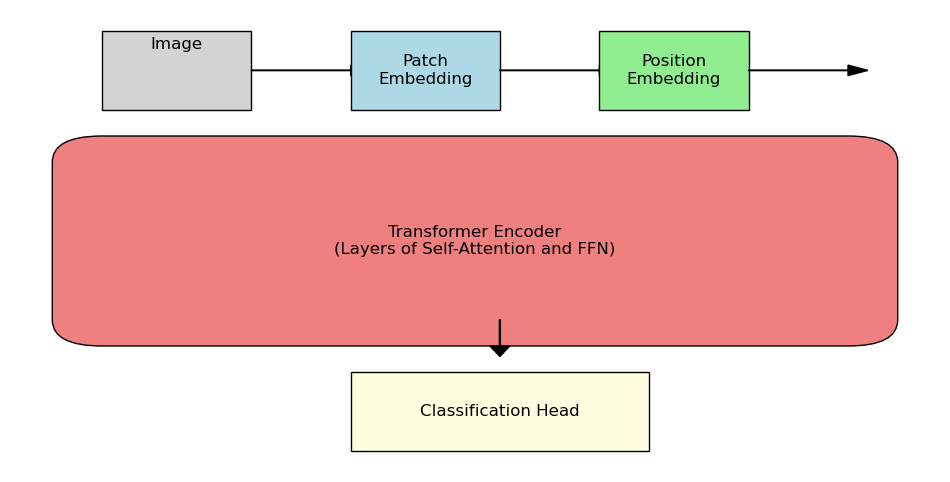

In [9]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def draw_vit_architecture():
    fig, ax = plt.subplots(figsize=(12, 6))

    # 图像分块
    ax.add_patch(patches.Rectangle((0.1, 0.7), 0.15, 0.15, edgecolor='black', facecolor='lightgray'))
    ax.text(0.175, 0.825, 'Image', horizontalalignment='center', verticalalignment='center', fontsize=12)

    ax.arrow(0.25, 0.775, 0.1, 0, head_width=0.02, head_length=0.02, fc='k', ec='k')

    ax.add_patch(patches.Rectangle((0.35, 0.7), 0.15, 0.15, edgecolor='black', facecolor='lightblue'))
    ax.text(0.425, 0.775, 'Patch\nEmbedding', horizontalalignment='center', verticalalignment='center', fontsize=12)

    ax.arrow(0.5, 0.775, 0.1, 0, head_width=0.02, head_length=0.02, fc='k', ec='k')

    ax.add_patch(patches.Rectangle((0.6, 0.7), 0.15, 0.15, edgecolor='black', facecolor='lightgreen'))
    ax.text(0.675, 0.775, 'Position\nEmbedding', horizontalalignment='center', verticalalignment='center', fontsize=12)

    ax.arrow(0.75, 0.775, 0.1, 0, head_width=0.02, head_length=0.02, fc='k', ec='k')

    # Transformer 编码器
    transformer_encoder = patches.FancyBboxPatch((0.1, 0.3), 0.75, 0.3, boxstyle="round,pad=0.05", edgecolor='black', facecolor='lightcoral')
    ax.add_patch(transformer_encoder)
    ax.text(0.475, 0.45, 'Transformer Encoder\n(Layers of Self-Attention and FFN)', horizontalalignment='center', verticalalignment='center', fontsize=12)

    ax.arrow(0.5, 0.3, 0.0, -0.05, head_width=0.02, head_length=0.02, fc='k', ec='k')

    # 分类头
    ax.add_patch(patches.Rectangle((0.35, 0.05), 0.3, 0.15, edgecolor='black', facecolor='lightyellow'))
    ax.text(0.5, 0.125, 'Classification Head', horizontalalignment='center', verticalalignment='center', fontsize=12)

    # 移除轴
    ax.axis('off')

    plt.show()

draw_vit_architecture()


In [10]:
from model import ResNet
resnet = ResNet.ResNet18()
device = torch.device('cpu')
resnet.load_state_dict(torch.load('./results/resnet18_model.pth', map_location=device))
print(resnet)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (shortcut): Sequential()
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=

In [11]:
summary(resnet)


Layer (type:depth-idx)                   Param #
ResNet                                   --
├─Conv2d: 1-1                            1,728
├─BatchNorm2d: 1-2                       128
├─Sequential: 1-3                        --
│    └─BasicBlock: 2-1                   --
│    │    └─Conv2d: 3-1                  36,864
│    │    └─BatchNorm2d: 3-2             128
│    │    └─Conv2d: 3-3                  36,864
│    │    └─BatchNorm2d: 3-4             128
│    │    └─Sequential: 3-5              --
│    └─BasicBlock: 2-2                   --
│    │    └─Conv2d: 3-6                  36,864
│    │    └─BatchNorm2d: 3-7             128
│    │    └─Conv2d: 3-8                  36,864
│    │    └─BatchNorm2d: 3-9             128
│    │    └─Sequential: 3-10             --
├─Sequential: 1-4                        --
│    └─BasicBlock: 2-3                   --
│    │    └─Conv2d: 3-11                 73,728
│    │    └─BatchNorm2d: 3-12            256
│    │    └─Conv2d: 3-13                 1

In [17]:
from model import VGG
vgg = VGG.VGG('VGG19' )
device = torch.device('cpu')
vgg.load_state_dict(torch.load('./results/vgg_model.pth', map_location=device))
print(vgg)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

In [18]:
summary(vgg)

Layer (type:depth-idx)                   Param #
VGG                                      --
├─Sequential: 1-1                        --
│    └─Conv2d: 2-1                       1,792
│    └─BatchNorm2d: 2-2                  128
│    └─ReLU: 2-3                         --
│    └─Conv2d: 2-4                       36,928
│    └─BatchNorm2d: 2-5                  128
│    └─ReLU: 2-6                         --
│    └─MaxPool2d: 2-7                    --
│    └─Conv2d: 2-8                       73,856
│    └─BatchNorm2d: 2-9                  256
│    └─ReLU: 2-10                        --
│    └─Conv2d: 2-11                      147,584
│    └─BatchNorm2d: 2-12                 256
│    └─ReLU: 2-13                        --
│    └─MaxPool2d: 2-14                   --
│    └─Conv2d: 2-15                      295,168
│    └─BatchNorm2d: 2-16                 512
│    └─ReLU: 2-17                        --
│    └─Conv2d: 2-18                      590,080
│    └─BatchNorm2d: 2-19                